In [1]:
### TWINPLOTS.IPYNB -- plots for twin star paper

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

sns.set_palette('Set1',color_codes=True)

In [50]:
EOS_PATH = '../etc/macro-SKI5_2009.csv'

eos_dat = np.genfromtxt(EOS_PATH,names=True,delimiter=',',dtype=None,encoding=None) # load EOS table
Ms = eos_dat['M']
Lambdas = eos_dat['Lambda']

Mmax_pos = np.argmax(Ms) # truncate table at maximum NS mass
Ms = Ms[:Mmax_pos+1]
Mmax = Ms[-1]
Lambdas = Lambdas[:Mmax_pos+1]

onset = np.where(np.gradient(Ms) < 0.)[0][0]
offset = np.where(np.gradient(Ms) < 0.)[0][-1]

In [51]:
def Lambda_of_m(m,Lambda14=400.,Mtwin=1.6,Lgap=100.,LambdaMmax=3.):
    
    Lambda_hadron = Lambda14*(m/1.4)**(-6)
    
    Lambda_mmax = (Lambda14*(Mtwin/1.4)**(-6)- 2.*Lgap)*(mmax/Mtwin)**(-9) - LambdaMmax
    
    Lambda_hybrid = (Lambda14*(Mtwin/1.4)**(-6)- 2.*Lgap)*(m/Mtwin)**(-9) - Lambda_mmax*((m-Mtwin)/(mmax-Mtwin))
    
    return np.where(m > Mtwin,Lambda_hybrid,Lambda_hadron)

mmax = Mmax

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


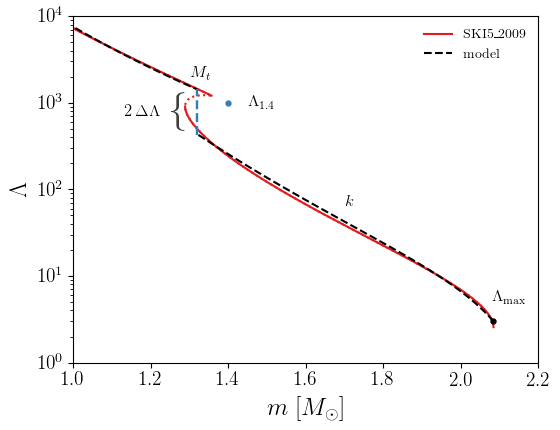

In [71]:
plt.figure(figsize=(6,4.5))

plt.plot(Ms,Lambdas,c=sns.color_palette()[0],ls=':')
plt.plot(Ms[:onset+1],Lambdas[:onset+1],c=sns.color_palette()[0])
plt.plot(Ms[offset:],Lambdas[offset:],c=sns.color_palette()[0],label=r'SKI5\_2009')

twin_pos = np.where(Ms >= 1.32)[0][0]
end_pos = len(Ms) - np.where(np.array(list(reversed(Ms))) < 1.32)[0][0]

#plt.plot(Ms,Lambda_of_m(Ms,1000.,1.32,500.,3.),c='k',ls=':')
plt.plot(Ms[:twin_pos],Lambda_of_m(Ms[:twin_pos],1000.,1.32,495.,3.),c='k',ls='--')
plt.plot(Ms[end_pos:],Lambda_of_m(Ms[end_pos:],1000.,1.32,495.,3.),c='k',ls='--',label=r'model')

plt.vlines(1.32,float(Lambda_of_m(Ms[end_pos],1000.,1.32,495.,3.)),float(Lambda_of_m(Ms[twin_pos-1],1000.,1.32,500.,3.)),color=sns.color_palette()[1],linestyle='--',lw=1.75, zorder=10)
plt.scatter(1.4,1000.,c=sns.color_palette()[1],marker='.',s=50,zorder=10)
plt.scatter(Mmax,3.,c='k',marker='.',s=50,zorder=10)

plt.yscale('log')
plt.xlim(1.,2.2)
plt.ylim(1.,1e4)
plt.xlabel(r'$m\;[M_{\odot}]$',size=18)
plt.ylabel(r'$\Lambda$',size=18)

plt.annotate(r'$\Lambda_{1.4}$',(1.45,900.),size=12)
plt.annotate(r'$M_t$',(1.3,2000.),size=12)
plt.annotate(r'$2\, \Delta\Lambda$',(1.13,700.),size=12)
plt.annotate(r'$\lbrace$',(1.25,620.),size=28,alpha=0.75)
plt.annotate(r'$k$',(1.7,65.),size=12)
plt.annotate(r'$\Lambda_{\rm max}$',(2.08,5.),size=12)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(frameon=False)
plt.savefig('SKI52009_fit.png')

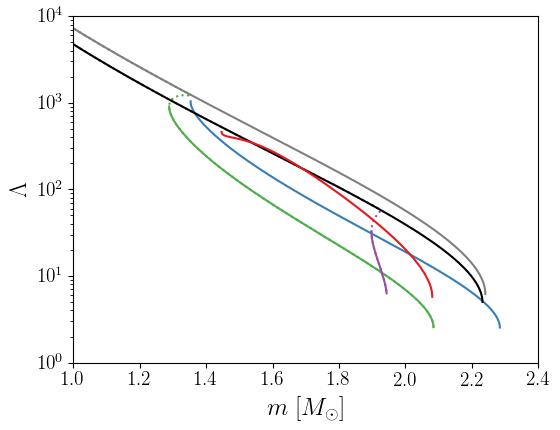

In [20]:
eospaths = ['../etc/macro-SKI5.csv', '../etc/macro-SKI5_2006.csv', '../etc/macro-SKI5_2009.csv', '../etc/macro-SK272.csv', '../etc/macro-SK272_2506.csv', '../etc/macro-SK272_3505.csv']
styles = ['-','-','-','-','-','-']
colors = ['grey',sns.color_palette()[1],sns.color_palette()[2],'k',sns.color_palette()[0],sns.color_palette()[3]]
twin = [False,True,True,False,True,True]
dot = [False,False,True,False,False,True]

plt.figure(figsize=(6,4.5))

for i,eospath in enumerate(eospaths):
    
    eos_dat = np.genfromtxt(eospath,names=True,delimiter=',',dtype=None,encoding=None) # load EOS table
    Ms = eos_dat['M']
    Lambdas = eos_dat['Lambda']

    Mmax_pos = np.argmax(Ms) # truncate table at maximum NS mass
    Ms = Ms[:Mmax_pos+1]
    Mmax = Ms[-1]
    Lambdas = Lambdas[:Mmax_pos+1]

    if twin[i]:
        onset = np.where(np.gradient(Ms) < 0.)[0][0]
        offset = np.where(np.gradient(Ms) < 0.)[0][-1]
        
        if dot[i]: plt.plot(Ms,Lambdas,c=colors[i],ls=':',zorder=-1)
        #plt.plot(Ms[:onset+1],Lambdas[:onset+1],c=colors[i],ls=styles[i])
        plt.plot(Ms[offset:],Lambdas[offset:],c=colors[i],ls=styles[i])
    
    else:
    
        plt.plot(Ms,Lambdas,c=colors[i],ls=styles[i])
             
plt.yscale('log')
plt.xlim(1.,2.4)
plt.ylim(1.,1e4)
plt.xlabel(r'$m\;[M_{\odot}]$',size=18)
plt.ylabel(r'$\Lambda$',size=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

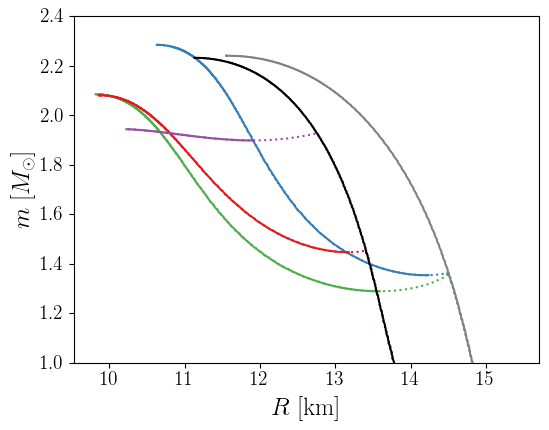

In [21]:
eospaths = ['../etc/macro-SKI5.csv', '../etc/macro-SKI5_2006.csv', '../etc/macro-SKI5_2009.csv', '../etc/macro-SK272.csv', '../etc/macro-SK272_2506.csv', '../etc/macro-SK272_3505.csv']
styles = ['-','-','-','-','-','-']
colors = ['grey',sns.color_palette()[1],sns.color_palette()[2],'k',sns.color_palette()[0],sns.color_palette()[3]]
twin = [False,True,True,False,True,True]
dot = [False,True,True,False,True,True]

plt.figure(figsize=(6,4.5))

for i,eospath in enumerate(eospaths):
    
    eos_dat = np.genfromtxt(eospath,names=True,delimiter=',',dtype=None,encoding=None) # load EOS table
    Ms = eos_dat['M']
    Rs = eos_dat['R']

    Mmax_pos = np.argmax(Ms) # truncate table at maximum NS mass
    Ms = Ms[:Mmax_pos+1]
    Mmax = Ms[-1]
    Rs = Rs[:Mmax_pos+1]

    if twin[i]:
        onset = np.where(np.gradient(Ms) < 0.)[0][0]
        offset = np.where(np.gradient(Ms) < 0.)[0][-1]
        
        if dot[i]: plt.plot(Rs,Ms,c=colors[i],ls=':',zorder=-1)
        #plt.plot(Ms[:onset+1],Lambdas[:onset+1],c=colors[i],ls=styles[i])
        plt.plot(Rs[offset:],Ms[offset:],c=colors[i],ls=styles[i])
    
    else:
    
        plt.plot(Rs,Ms,c=colors[i],ls=styles[i])
             
plt.ylim(1.,2.4)
#plt.xlim(1.,1e4)
plt.ylabel(r'$m\;[M_{\odot}]$',size=18)
plt.xlabel(r'$R$ [km]',size=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

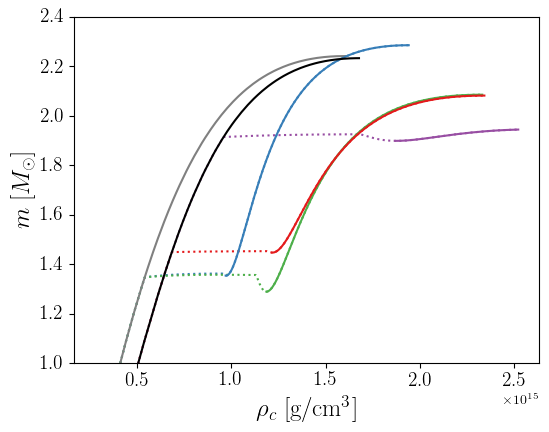

In [22]:
eospaths = ['../etc/macro-SKI5.csv', '../etc/macro-SKI5_2006.csv', '../etc/macro-SKI5_2009.csv', '../etc/macro-SK272.csv', '../etc/macro-SK272_2506.csv', '../etc/macro-SK272_3505.csv']
styles = ['-','-','-','-','-','-']
colors = ['grey',sns.color_palette()[1],sns.color_palette()[2],'k',sns.color_palette()[0],sns.color_palette()[3]]
twin = [False,True,True,False,True,True]
dot = [False,True,True,False,True,True]

plt.figure(figsize=(6,4.5))

for i,eospath in enumerate(eospaths):
    
    eos_dat = np.genfromtxt(eospath,names=True,delimiter=',',dtype=None,encoding=None) # load EOS table
    Ms = eos_dat['M']
    rhocs = eos_dat['rhoc']

    Mmax_pos = np.argmax(Ms) # truncate table at maximum NS mass
    Ms = Ms[:Mmax_pos+1]
    Mmax = Ms[-1]
    rhocs = rhocs[:Mmax_pos+1]

    if twin[i]:
        onset = np.where(np.gradient(Ms) < 0.)[0][0]
        offset = np.where(np.gradient(Ms) < 0.)[0][-1]
        
        if dot[i]: plt.plot(rhocs,Ms,c=colors[i],ls=':',zorder=-1)
        #plt.plot(Ms[:onset+1],Lambdas[:onset+1],c=colors[i],ls=styles[i])
        plt.plot(rhocs[offset:],Ms[offset:],c=colors[i],ls=styles[i])
    
    else:
    
        plt.plot(rhocs,Ms,c=colors[i],ls=styles[i])
             
#plt.yscale('log')
plt.ylim(1.,2.4)
#plt.ylim(1.,1e4)
plt.ylabel(r'$m\;[M_{\odot}]$',size=18)
plt.xlabel(r'$\rho_c$ [g/cm$^3$]',size=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

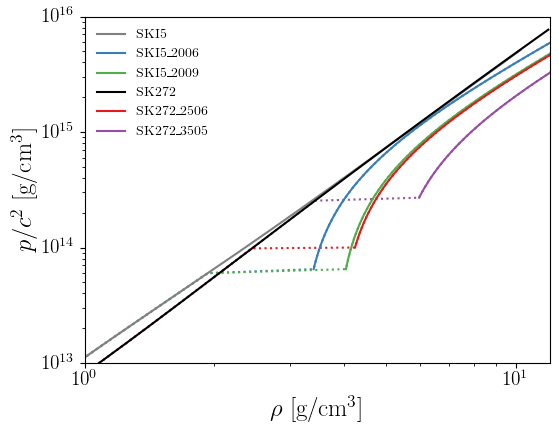

In [23]:
eospaths = ['../etc/SKI5.csv', '../etc/SKI5_2006.csv', '../etc/SKI5_2009.csv', '../etc/SK272.csv', '../etc/SK272_2506.csv', '../etc/SK272_3505.csv']
styles = ['-','-','-','-','-','-']
colors = ['grey',sns.color_palette()[1],sns.color_palette()[2],'k',sns.color_palette()[0],sns.color_palette()[3]]
twin = [False,True,True,False,True,True]
dot = [False,True,True,False,True,True]
onsets = [0.,2.0,2.0,0.,2.5,3.5]
labels = [r'SKI5',r'SKI5\_2006',r'SKI5\_2009',r'SK272',r'SK272\_2506',r'SK272\_3505']

plt.figure(figsize=(6,4.5))

for i,eospath in enumerate(eospaths):
    
    eos_dat = np.genfromtxt(eospath,names=True,delimiter=',',dtype=None,encoding=None) # load EOS table
    rhos = eos_dat['baryon_density']
    ps = eos_dat['pressurec2']
    
    if twin[i]:
        onset = np.where(rhos >= onsets[i]*2.8e14)[0][0]
        #offset = np.where(np.gradient(ps) <= 9e-10)[0][-1]
        
        if dot[i]: plt.plot(rhos/2.8e14,ps,c=colors[i],ls=':',zorder=-1)
        #plt.plot(Ms[:onset+1],Lambdas[:onset+1],c=colors[i],ls=styles[i])
        plt.plot(rhos[onset:]/2.8e14,ps[onset:],c=colors[i],ls=styles[i],label=labels[i])
    
    else:
    
        plt.plot(rhos/2.8e14,ps,c=colors[i],ls=styles[i],label=labels[i])
        
plt.xscale('log')             
plt.yscale('log')
plt.xlim(1.,12.)
plt.ylim(1e13,1e16)
plt.ylabel(r'$p/c^2$ [g/cm$^3$]',size=18)
plt.xlabel(r'$\rho$ [g/cm$^3$]',size=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(frameon=False)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


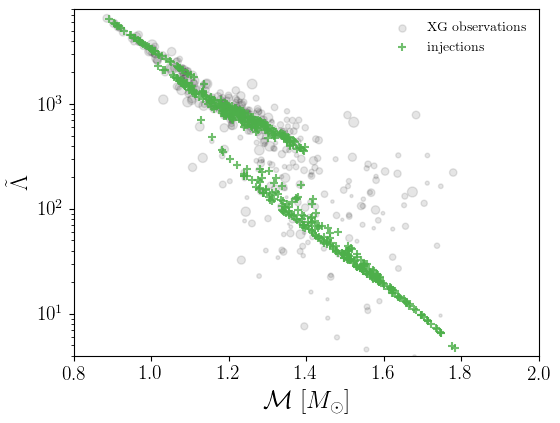

In [68]:
eos = 'SKI52009'

short_scenario = '3G'
scenario = '3Gm1'
scenario_dict = {'O5': 'A+ (1 yr)', 'O5y2': 'A+ (2 yr)', '3Gd1': 'XG (1 d)', '3Gw1': 'XG (1 wk)', '3Gm1': 'XG (1 mo)'}
color = sns.color_palette()[2]
pop = ''

poppath = './results/unif_BNS_{1}{2}/{0}_unif_BNS_{1}_detected-{3}.csv'.format(short_scenario,eos,pop,scenario)
pop_dat = np.genfromtxt(poppath,names=True,delimiter=',',dtype=None,encoding=None)
mcs = pop_dat['mc']
Lts = pop_dat['Lt']
mcs_det = pop_dat['mc_det']
Lts_det = pop_dat['Lt_det']
dLts = pop_dat['dLt']

plt.figure(figsize=(6,4.5))
plt.scatter(mcs_det,Lts_det,marker='.',alpha=0.1,c='k',s=4*20.*dLts/np.mean(dLts),label='XG observations')
plt.scatter(mcs,Lts,marker='+',c=color,label='injections',alpha=0.8)

plt.yscale('log')
plt.xlim(0.8,2.)
plt.ylim(4.,8000.)
plt.ylabel(r'$\tilde{\Lambda}$',size=18)
plt.xlabel(r'$\mathcal{M}\;[M_\odot]$',size=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(frameon=False)
plt.show()

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passi

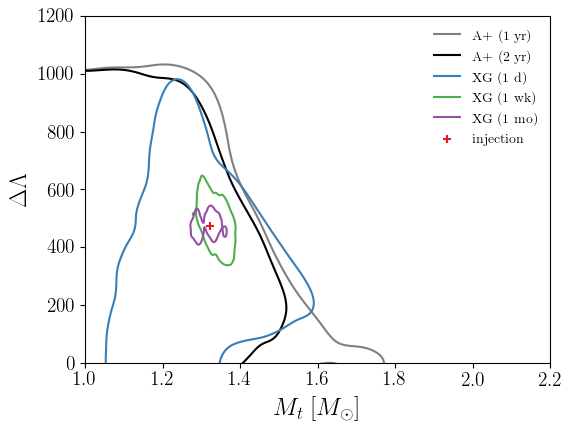

In [24]:
eos = 'SKI52009'
short_scenarios = ['O5','O5','3G','3G','3G']
scenarios = ['O5','O5y2','3Gd1','3Gw1','3Gm1']
scenario_dict = {'O5': 'A+ (1 yr)', 'O5y2': 'A+ (2 yr)', '3Gd1': 'XG (1 d)', '3Gw1': 'XG (1 wk)', '3Gm1': 'XG (1 mo)'}
colors = ['grey','k',sns.color_palette()[1],sns.color_palette()[2],sns.color_palette()[3]]
pops = ['','v1','v2','v3','v4', 'v5','v6','v7','v8','v9']

plt.figure(figsize=(6,4.5))

for i,scenario in enumerate(scenarios):
    
    all_Mtwins = []
    all_DeltaLs = []
    
    for pop in pops:
    
        postpath = './results/unif_BNS_{1}{2}/{0}_unif_BNS_{1}_recovery-{3}.csv'.format(short_scenarios[i],eos,pop,scenario)

        post_dat = np.genfromtxt(postpath,names=True,delimiter=',',dtype=None,encoding=None)
        Mtwins = post_dat['Mt']
        DeltaLs = post_dat['DeltaL']

        refs = np.where(DeltaLs < 100.)
        Mtwins_ref = np.append(Mtwins,Mtwins[refs])
        DeltaLs_ref = np.append(DeltaLs,-DeltaLs[refs])

        refs = np.where(Mtwins < 1.1)
        Mtwins_ref = np.append(Mtwins_ref,1.-np.abs(Mtwins[refs]-1.))
        DeltaLs_ref = np.append(DeltaLs_ref,DeltaLs[refs])
        
        all_Mtwins += list(Mtwins_ref)
        all_DeltaLs += list(DeltaLs_ref)

        #sns.kdeplot(Mtwins_ref,DeltaLs_ref,levels=[0.1],color=colors[i],alpha=0.2)

    sns.kdeplot(all_Mtwins,all_DeltaLs,levels=[0.1],label=scenario_dict[scenario],color=colors[i])

injpath = './results/unif_BNS_{0}{1}/{0}_twinparams.csv'.format(eos,pop)
inj_dat = np.genfromtxt(injpath,names=True,delimiter=',',dtype=None,encoding=None)
plt.scatter(inj_dat['Mt'],inj_dat['DeltaL'],marker='+',c=sns.color_palette()[0],zorder=10,label='injection')

plt.xlim(1.,2.2)
plt.ylim(0.,1200.)
plt.ylabel(r'$\Delta\Lambda$',size=18)
plt.xlabel(r'$M_t\;[M_\odot]$',size=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(frameon=False)
plt.show()

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passi

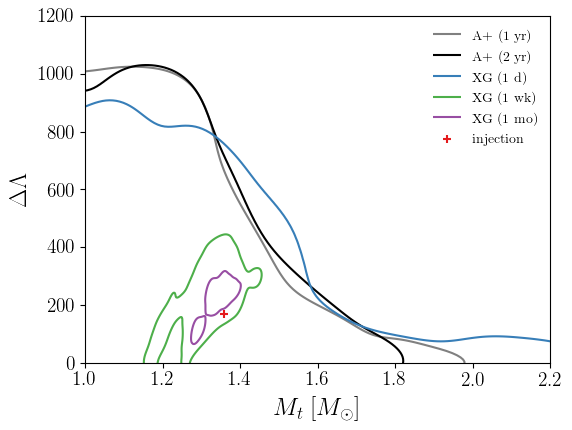

In [25]:
eos = 'SKI52006'
short_scenarios = ['O5','O5','3G','3G','3G']
scenarios = ['O5','O5y2','3Gd1','3Gw1','3Gm1']
scenario_dict = {'O5': 'A+ (1 yr)', 'O5y2': 'A+ (2 yr)', '3Gd1': 'XG (1 d)', '3Gw1': 'XG (1 wk)', '3Gm1': 'XG (1 mo)'}
colors = ['grey','k',sns.color_palette()[1],sns.color_palette()[2],sns.color_palette()[3]]
pops = ['','v1','v2','v3','v4', 'v5','v6','v7','v8','v9']

plt.figure(figsize=(6,4.5))

for i,scenario in enumerate(scenarios):
    
    all_Mtwins = []
    all_DeltaLs = []
    
    for pop in pops:
    
        postpath = './results/unif_BNS_{1}{2}/{0}_unif_BNS_{1}_recovery-{3}.csv'.format(short_scenarios[i],eos,pop,scenario)

        post_dat = np.genfromtxt(postpath,names=True,delimiter=',',dtype=None,encoding=None)
        Mtwins = post_dat['Mt']
        DeltaLs = post_dat['DeltaL']

        refs = np.where(DeltaLs < 100.)
        Mtwins_ref = np.append(Mtwins,Mtwins[refs])
        DeltaLs_ref = np.append(DeltaLs,-DeltaLs[refs])

        refs = np.where(Mtwins < 1.1)
        Mtwins_ref = np.append(Mtwins_ref,1.-np.abs(Mtwins[refs]-1.))
        DeltaLs_ref = np.append(DeltaLs_ref,DeltaLs[refs])
        
        all_Mtwins += list(Mtwins_ref)
        all_DeltaLs += list(DeltaLs_ref)

        #sns.kdeplot(Mtwins_ref,DeltaLs_ref,levels=[0.1],color=colors[i],alpha=0.2)

    sns.kdeplot(all_Mtwins,all_DeltaLs,levels=[0.1],label=scenario_dict[scenario],color=colors[i])

injpath = './results/unif_BNS_{0}{1}/{0}_twinparams.csv'.format(eos,pop)
inj_dat = np.genfromtxt(injpath,names=True,delimiter=',',dtype=None,encoding=None)
plt.scatter(inj_dat['Mt'],inj_dat['DeltaL'],marker='+',c=sns.color_palette()[0],zorder=10,label='injection')

plt.xlim(1.,2.2)
plt.ylim(0.,1200.)
plt.ylabel(r'$\Delta\Lambda$',size=18)
plt.xlabel(r'$M_t\;[M_\odot]$',size=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(frameon=False)
plt.show()

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passi

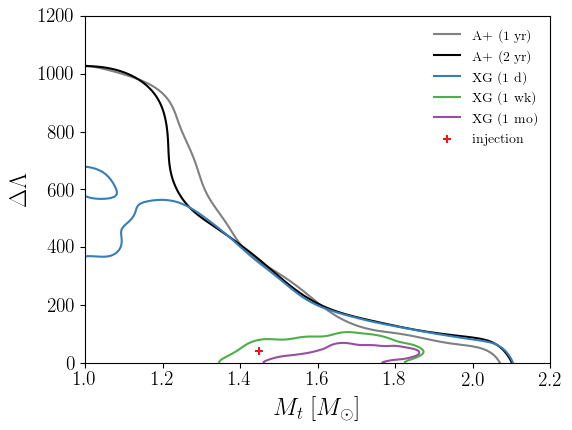

In [26]:
eos = 'SK2722506'
short_scenarios = ['O5','O5','3G','3G','3G']
scenarios = ['O5','O5y2','3Gd1','3Gw1','3Gm1']
scenario_dict = {'O5': 'A+ (1 yr)', 'O5y2': 'A+ (2 yr)', '3Gd1': 'XG (1 d)', '3Gw1': 'XG (1 wk)', '3Gm1': 'XG (1 mo)'}
colors = ['grey','k',sns.color_palette()[1],sns.color_palette()[2],sns.color_palette()[3]]
pops = ['','v1','v2','v3','v4', 'v5','v6','v7','v8','v9']

plt.figure(figsize=(6,4.5))

for i,scenario in enumerate(scenarios):
    
    all_Mtwins = []
    all_DeltaLs = []
    
    for pop in pops:
    
        postpath = './results/unif_BNS_{1}{2}/{0}_unif_BNS_{1}_recovery-{3}.csv'.format(short_scenarios[i],eos,pop,scenario)

        post_dat = np.genfromtxt(postpath,names=True,delimiter=',',dtype=None,encoding=None)
        Mtwins = post_dat['Mt']
        DeltaLs = post_dat['DeltaL']

        refs = np.where(DeltaLs < 100.)
        Mtwins_ref = np.append(Mtwins,Mtwins[refs])
        DeltaLs_ref = np.append(DeltaLs,-DeltaLs[refs])

        refs = np.where(Mtwins < 1.1)
        Mtwins_ref = np.append(Mtwins_ref,1.-np.abs(Mtwins[refs]-1.))
        DeltaLs_ref = np.append(DeltaLs_ref,DeltaLs[refs])
        
        all_Mtwins += list(Mtwins_ref)
        all_DeltaLs += list(DeltaLs_ref)

        #sns.kdeplot(Mtwins_ref,DeltaLs_ref,levels=[0.1],color=colors[i],alpha=0.2)

    sns.kdeplot(all_Mtwins,all_DeltaLs,levels=[0.1],label=scenario_dict[scenario],color=colors[i])

injpath = './results/unif_BNS_{0}{1}/{0}_twinparams.csv'.format(eos,pop)
inj_dat = np.genfromtxt(injpath,names=True,delimiter=',',dtype=None,encoding=None)
plt.scatter(inj_dat['Mt'],inj_dat['DeltaL'],marker='+',c=sns.color_palette()[0],zorder=10,label='injection')

plt.xlim(1.,2.2)
plt.ylim(0.,1200.)
plt.ylabel(r'$\Delta\Lambda$',size=18)
plt.xlabel(r'$M_t\;[M_\odot]$',size=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(frameon=False)
plt.show()

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passi

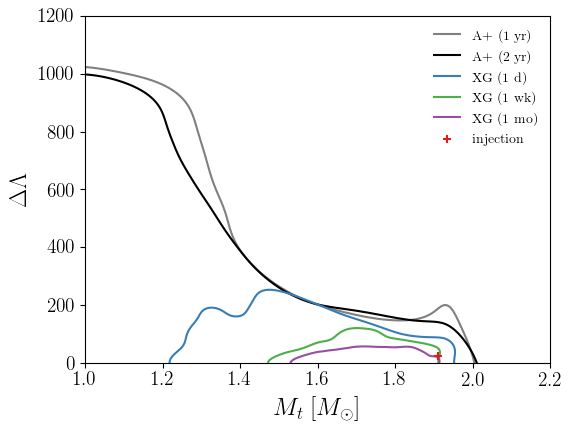

In [27]:
eos = 'SK2723505'
short_scenarios = ['O5','O5','3G','3G','3G']
scenarios = ['O5','O5y2','3Gd1','3Gw1','3Gm1']
scenario_dict = {'O5': 'A+ (1 yr)', 'O5y2': 'A+ (2 yr)', '3Gd1': 'XG (1 d)', '3Gw1': 'XG (1 wk)', '3Gm1': 'XG (1 mo)'}
colors = ['grey','k',sns.color_palette()[1],sns.color_palette()[2],sns.color_palette()[3]]
pops = ['','v1','v2','v3','v4', 'v5','v6','v7','v8','v9']

plt.figure(figsize=(6,4.5))

for i,scenario in enumerate(scenarios):
    
    all_Mtwins = []
    all_DeltaLs = []
    
    for pop in pops:
    
        postpath = './results/unif_BNS_{1}{2}/{0}_unif_BNS_{1}_recovery-{3}.csv'.format(short_scenarios[i],eos,pop,scenario)

        post_dat = np.genfromtxt(postpath,names=True,delimiter=',',dtype=None,encoding=None)
        Mtwins = post_dat['Mt']
        DeltaLs = post_dat['DeltaL']

        refs = np.where(DeltaLs < 100.)
        Mtwins_ref = np.append(Mtwins,Mtwins[refs])
        DeltaLs_ref = np.append(DeltaLs,-DeltaLs[refs])

        refs = np.where(Mtwins < 1.1)
        Mtwins_ref = np.append(Mtwins_ref,1.-np.abs(Mtwins[refs]-1.))
        DeltaLs_ref = np.append(DeltaLs_ref,DeltaLs[refs])
        
        all_Mtwins += list(Mtwins_ref)
        all_DeltaLs += list(DeltaLs_ref)

        #sns.kdeplot(Mtwins_ref,DeltaLs_ref,levels=[0.1],color=colors[i],alpha=0.2)

    sns.kdeplot(all_Mtwins,all_DeltaLs,levels=[0.1],label=scenario_dict[scenario],color=colors[i])

injpath = './results/unif_BNS_{0}{1}/{0}_twinparams.csv'.format(eos,pop)
inj_dat = np.genfromtxt(injpath,names=True,delimiter=',',dtype=None,encoding=None)
plt.scatter(inj_dat['Mt'],inj_dat['DeltaL'],marker='+',c=sns.color_palette()[0],zorder=10,label='injection')

plt.xlim(1.,2.2)
plt.ylim(0.,1200.)
plt.ylabel(r'$\Delta\Lambda$',size=18)
plt.xlabel(r'$M_t\;[M_\odot]$',size=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(frameon=False)
plt.show()

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passi

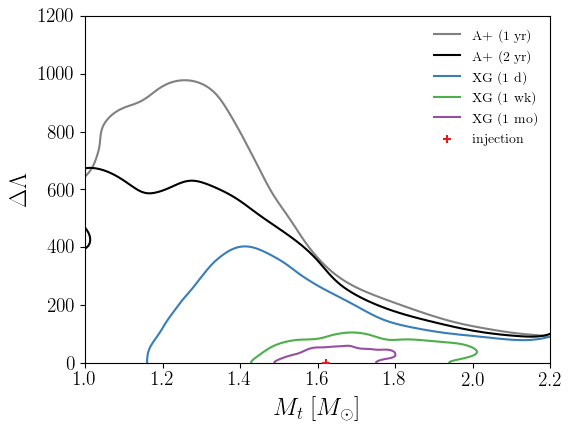

In [28]:
eos = 'SKI5'
short_scenarios = ['O5','O5','3G','3G','3G']
scenarios = ['O5','O5y2','3Gd1','3Gw1','3Gm1']
scenario_dict = {'O5': 'A+ (1 yr)', 'O5y2': 'A+ (2 yr)', '3Gd1': 'XG (1 d)', '3Gw1': 'XG (1 wk)', '3Gm1': 'XG (1 mo)'}
colors = ['grey','k',sns.color_palette()[1],sns.color_palette()[2],sns.color_palette()[3]]
pops = ['','v1','v2','v3','v4', 'v5','v6','v7','v8','v9']

plt.figure(figsize=(6,4.5))

for i,scenario in enumerate(scenarios):
    
    all_Mtwins = []
    all_DeltaLs = []
    
    for pop in pops:
    
        postpath = './results/unif_BNS_{1}{2}/{0}_unif_BNS_{1}_recovery-{3}.csv'.format(short_scenarios[i],eos,pop,scenario)

        post_dat = np.genfromtxt(postpath,names=True,delimiter=',',dtype=None,encoding=None)
        Mtwins = post_dat['Mt']
        DeltaLs = post_dat['DeltaL']

        refs = np.where(DeltaLs < 100.)
        Mtwins_ref = np.append(Mtwins,Mtwins[refs])
        DeltaLs_ref = np.append(DeltaLs,-DeltaLs[refs])

        refs = np.where(Mtwins < 1.1)
        Mtwins_ref = np.append(Mtwins_ref,1.-np.abs(Mtwins[refs]-1.))
        DeltaLs_ref = np.append(DeltaLs_ref,DeltaLs[refs])
        
        all_Mtwins += list(Mtwins_ref)
        all_DeltaLs += list(DeltaLs_ref)

        #sns.kdeplot(Mtwins_ref,DeltaLs_ref,levels=[0.1],color=colors[i],alpha=0.2)

    sns.kdeplot(all_Mtwins,all_DeltaLs,levels=[0.1],label=scenario_dict[scenario],color=colors[i])

injpath = './results/unif_BNS_{0}{1}/{0}_twinparams.csv'.format(eos,pop)
inj_dat = np.genfromtxt(injpath,names=True,delimiter=',',dtype=None,encoding=None)
plt.scatter(inj_dat['Mt'],inj_dat['DeltaL'],marker='+',c=sns.color_palette()[0],zorder=10,label='injection')

plt.xlim(1.,2.2)
plt.ylim(0.,1200.)
plt.ylabel(r'$\Delta\Lambda$',size=18)
plt.xlabel(r'$M_t\;[M_\odot]$',size=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(frameon=False)
plt.show()

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passi

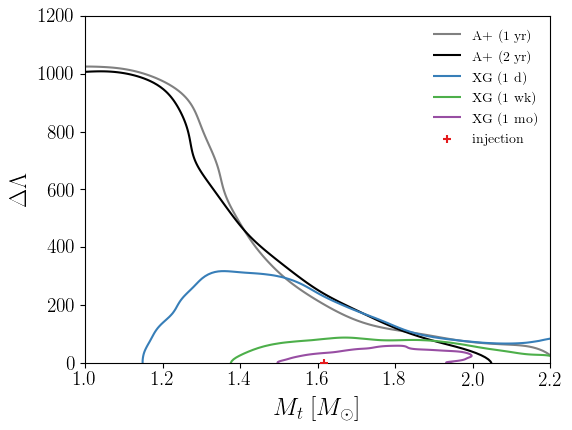

In [69]:
eos = 'SK272'
short_scenarios = ['O5','O5','3G','3G','3G']
scenarios = ['O5','O5y2','3Gd1','3Gw1','3Gm1']
scenario_dict = {'O5': 'A+ (1 yr)', 'O5y2': 'A+ (2 yr)', '3Gd1': 'XG (1 d)', '3Gw1': 'XG (1 wk)', '3Gm1': 'XG (1 mo)'}
colors = ['grey','k',sns.color_palette()[1],sns.color_palette()[2],sns.color_palette()[3]]
pops = ['','v1','v2','v3','v4', 'v5','v6','v7','v8','v9']

plt.figure(figsize=(6,4.5))

for i,scenario in enumerate(scenarios):
    
    all_Mtwins = []
    all_DeltaLs = []
    
    for pop in pops:
    
        postpath = './results/unif_BNS_{1}{2}/{0}_unif_BNS_{1}_recovery-{3}.csv'.format(short_scenarios[i],eos,pop,scenario)

        post_dat = np.genfromtxt(postpath,names=True,delimiter=',',dtype=None,encoding=None)
        Mtwins = post_dat['Mt']
        DeltaLs = post_dat['DeltaL']

        refs = np.where(DeltaLs < 100.)
        Mtwins_ref = np.append(Mtwins,Mtwins[refs])
        DeltaLs_ref = np.append(DeltaLs,-DeltaLs[refs])

        refs = np.where(Mtwins < 1.1)
        Mtwins_ref = np.append(Mtwins_ref,1.-np.abs(Mtwins[refs]-1.))
        DeltaLs_ref = np.append(DeltaLs_ref,DeltaLs[refs])
        
        all_Mtwins += list(Mtwins_ref)
        all_DeltaLs += list(DeltaLs_ref)

        #sns.kdeplot(Mtwins_ref,DeltaLs_ref,levels=[0.1],color=colors[i],alpha=0.2)

    sns.kdeplot(all_Mtwins,all_DeltaLs,levels=[0.1],label=scenario_dict[scenario],color=colors[i])

injpath = './results/unif_BNS_{0}{1}/{0}_twinparams.csv'.format(eos,pop)
inj_dat = np.genfromtxt(injpath,names=True,delimiter=',',dtype=None,encoding=None)
plt.scatter(inj_dat['Mt'],inj_dat['DeltaL'],marker='+',c=sns.color_palette()[0],zorder=10,label='injection')

plt.xlim(1.,2.2)
plt.ylim(0.,1200.)
plt.ylabel(r'$\Delta\Lambda$',size=18)
plt.xlabel(r'$M_t\;[M_\odot]$',size=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(frameon=False)
plt.show()

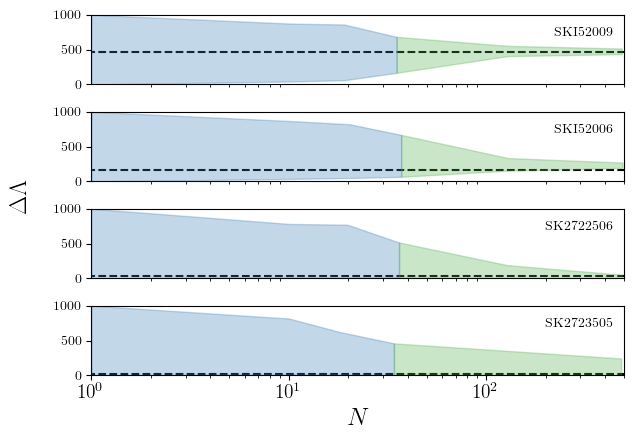

In [52]:
eoss = ['SKI52009','SKI52006','SK2722506','SK2723505']

cl = 0.90
colors = ['grey','k',sns.color_palette()[1],sns.color_palette()[2],sns.color_palette()[3]]
pops = ['','v1','v2','v3','v4', 'v5','v6','v7','v8','v9']

fig, axs = plt.subplots(4, 1,figsize=(6,4.5))

for i,eos in enumerate(eoss):
    
    results_path = './results/unif_BNS_{0}'.format(eos)
    
    alldDeltaL90s_ub = [1000.]
    alldDeltaL90s_lb = [0.]
    allevents = [1.]

    for scenario in ['O5','O5y2']:

        dDeltaL90s_ub = []
        dDeltaL90s_lb = []
        events = []

        for pop in pops:

            dat = np.genfromtxt(results_path+pop+'/O5_unif_BNS_{1}_recovery-{0}.csv'.format(scenario,eos),names=True,delimiter=',',dtype=None)
            dDeltaL90_ub = np.quantile(dat['DeltaL'],1.-(1.-cl)/2.)
            dDeltaL90_lb = np.quantile(dat['DeltaL'],(1.-cl)/2.)

            det = np.genfromtxt(results_path+pop+'/O5_unif_BNS_{1}_detected-{0}.csv'.format(scenario,eos),names=True,delimiter=',',dtype=None)
            event = len(det['mc'])

            dDeltaL90s_ub += [dDeltaL90_ub]
            dDeltaL90s_lb += [dDeltaL90_lb]
            events += [event]

        alldDeltaL90s_ub += [np.mean(dDeltaL90s_ub)]
        alldDeltaL90s_lb += [np.mean(dDeltaL90s_lb)]
        allevents += [np.mean(events)]

    for scenario in ['3Gd1','3Gw1','3Gm1']:

        dDeltaL90s_ub = []
        dDeltaL90s_lb = []
        events = []

        for pop in pops:

            dat = np.genfromtxt(results_path+pop+'/3G_unif_BNS_{1}_recovery-{0}.csv'.format(scenario,eos),names=True,delimiter=',',dtype=None)
            dDeltaL90_ub = np.quantile(dat['DeltaL'],1.-(1.-cl)/2.)
            dDeltaL90_lb = np.quantile(dat['DeltaL'],(1.-cl)/2.)

            det = np.genfromtxt(results_path+pop+'/3G_unif_BNS_{1}_detected-{0}.csv'.format(scenario,eos),names=True,delimiter=',',dtype=None)
            event = len(det['mc'])

            dDeltaL90s_ub += [dDeltaL90_ub]
            dDeltaL90s_lb += [dDeltaL90_lb]
            events += [event]

        alldDeltaL90s_ub += [np.mean(dDeltaL90s_ub)]
        alldDeltaL90s_lb += [np.mean(dDeltaL90s_lb)]
        allevents += [allevents[2]+np.mean(events)]

    params = np.genfromtxt(results_path+'/{0}_twinparams.csv'.format(eos),names=True,delimiter=',',dtype=None)

    axs[i].fill_between(allevents[:4],alldDeltaL90s_ub[:4],alldDeltaL90s_lb[:4],alpha=0.3,color=colors[2])
    axs[i].fill_between(allevents[3:],alldDeltaL90s_ub[3:],alldDeltaL90s_lb[3:],alpha=0.3,color=colors[3])
    axs[i].plot([0.,500.],[params['DeltaL'],params['DeltaL']],color=colors[1],ls='--',label=eos,zorder=-1)
    
    axs[i].set_xscale('log')
    axs[i].set_xlim(1.,500.)
    axs[i].set_ylim(0.,1000.)
    if i != len(eoss)-1: axs[i].set_xticks([])
    axs[i].legend(frameon=False,handlelength=0)

fig.text(-0.03, 0.55, r'$\Delta\Lambda$', size=18, ha='center', va='center', rotation='vertical')    
axs[i].set_xlabel(r'$N$',size=18)
plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)

fig.tight_layout()    
plt.show()

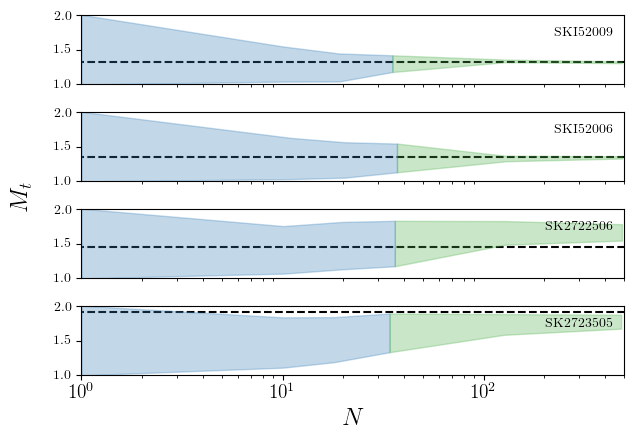

In [51]:
eoss = ['SKI52009','SKI52006','SK2722506','SK2723505']

cl = 0.90
colors = ['grey','k',sns.color_palette()[1],sns.color_palette()[2],sns.color_palette()[3]]
pops = ['','v1','v2','v3','v4', 'v5','v6','v7','v8','v9']

fig, axs = plt.subplots(4, 1,figsize=(6,4.5))

for i,eos in enumerate(eoss):
    
    results_path = './results/unif_BNS_{0}'.format(eos)
    
    alldDeltaL90s_ub = [2.]
    alldDeltaL90s_lb = [1.]
    allevents = [1.]

    for scenario in ['O5','O5y2']:

        dDeltaL90s_ub = []
        dDeltaL90s_lb = []
        events = []

        for pop in pops:

            dat = np.genfromtxt(results_path+pop+'/O5_unif_BNS_{1}_recovery-{0}.csv'.format(scenario,eos),names=True,delimiter=',',dtype=None)
            dDeltaL90_ub = np.quantile(dat['Mt'],1.-(1.-cl)/2.)
            dDeltaL90_lb = np.quantile(dat['Mt'],(1.-cl)/2.)

            det = np.genfromtxt(results_path+pop+'/O5_unif_BNS_{1}_detected-{0}.csv'.format(scenario,eos),names=True,delimiter=',',dtype=None)
            event = len(det['mc'])

            dDeltaL90s_ub += [dDeltaL90_ub]
            dDeltaL90s_lb += [dDeltaL90_lb]
            events += [event]

        alldDeltaL90s_ub += [np.mean(dDeltaL90s_ub)]
        alldDeltaL90s_lb += [np.mean(dDeltaL90s_lb)]
        allevents += [np.mean(events)]

    for scenario in ['3Gd1','3Gw1','3Gm1']:

        dDeltaL90s_ub = []
        dDeltaL90s_lb = []
        events = []

        for pop in pops:

            dat = np.genfromtxt(results_path+pop+'/3G_unif_BNS_{1}_recovery-{0}.csv'.format(scenario,eos),names=True,delimiter=',',dtype=None)
            dDeltaL90_ub = np.quantile(dat['Mt'],1.-(1.-cl)/2.)
            dDeltaL90_lb = np.quantile(dat['Mt'],(1.-cl)/2.)

            det = np.genfromtxt(results_path+pop+'/3G_unif_BNS_{1}_detected-{0}.csv'.format(scenario,eos),names=True,delimiter=',',dtype=None)
            event = len(det['mc'])

            dDeltaL90s_ub += [dDeltaL90_ub]
            dDeltaL90s_lb += [dDeltaL90_lb]
            events += [event]

        alldDeltaL90s_ub += [np.mean(dDeltaL90s_ub)]
        alldDeltaL90s_lb += [np.mean(dDeltaL90s_lb)]
        allevents += [allevents[2]+np.mean(events)]

    params = np.genfromtxt(results_path+'/{0}_twinparams.csv'.format(eos),names=True,delimiter=',',dtype=None)

    axs[i].fill_between(allevents[:4],alldDeltaL90s_ub[:4],alldDeltaL90s_lb[:4],alpha=0.3,color=colors[2])
    axs[i].fill_between(allevents[3:],alldDeltaL90s_ub[3:],alldDeltaL90s_lb[3:],alpha=0.3,color=colors[3])
    axs[i].plot([0.,500.],[params['Mt'],params['Mt']],color=colors[1],ls='--',label=eos,zorder=-1)
    
    axs[i].set_xscale('log')
    axs[i].set_xlim(1.,500.)
    axs[i].set_ylim(1.,2.)
    if i != len(eoss)-1: axs[i].set_xticks([])
    axs[i].set_yticks([1.,1.5,2.])
    axs[i].legend(frameon=False,handlelength=0)

fig.text(-0.03, 0.55, r'$M_t$', size=18, ha='center', va='center', rotation='vertical')    
axs[i].set_xlabel(r'$N$',size=18)
plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)

fig.tight_layout()    
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


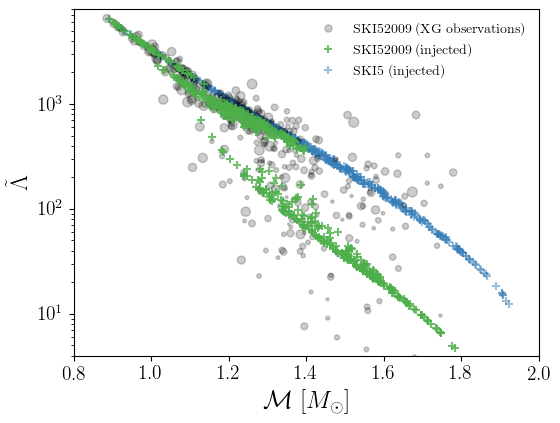

In [46]:
eos = 'SKI52009'

short_scenario = '3G'
scenario = '3Gm1'
scenario_dict = {'O5': 'A+ (1 yr)', 'O5y2': 'A+ (2 yr)', '3Gd1': 'XG (1 d)', '3Gw1': 'XG (1 wk)', '3Gm1': 'XG (1 mo)'}
color = sns.color_palette()[2]
pop = ''

poppath = './results/unif_BNS_{1}{2}/{0}_unif_BNS_{1}_detected-{3}.csv'.format(short_scenario,eos,pop,scenario)
pop_dat = np.genfromtxt(poppath,names=True,delimiter=',',dtype=None,encoding=None)
mcs = pop_dat['mc']
Lts = pop_dat['Lt']
mcs_det = pop_dat['mc_det']
Lts_det = pop_dat['Lt_det']
dLts = pop_dat['dLt']

plt.figure(figsize=(6,4.5))
plt.scatter(mcs_det,Lts_det,marker='.',alpha=0.2,c='k',s=4*20.*dLts/np.mean(dLts),label='SKI52009 (XG observations)')
plt.scatter(mcs,Lts,marker='+',c=color,label='SKI52009 (injected)',alpha=0.8)

eos = 'SKI5'

short_scenario = '3G'
scenario = '3Gm1'
scenario_dict = {'O5': 'A+ (1 yr)', 'O5y2': 'A+ (2 yr)', '3Gd1': 'XG (1 d)', '3Gw1': 'XG (1 wk)', '3Gm1': 'XG (1 mo)'}
color = sns.color_palette()[1]
pop = ''

poppath = './results/unif_BNS_{1}{2}/{0}_unif_BNS_{1}_detected-{3}.csv'.format(short_scenario,eos,pop,scenario)
pop_dat = np.genfromtxt(poppath,names=True,delimiter=',',dtype=None,encoding=None)
mcs = pop_dat['mc']
Lts = pop_dat['Lt']
mcs_det = pop_dat['mc_det']
Lts_det = pop_dat['Lt_det']
dLts = pop_dat['dLt']

#plt.figure(figsize=(6,4.5))
#plt.scatter(mcs_det,Lts_det,marker='.',alpha=0.1,c='k',s=4*20.*dLts/np.mean(dLts),label='XG observations')
plt.scatter(mcs,Lts,marker='+',c=color,label='SKI5 (injected)',alpha=0.5,zorder=-1)

plt.yscale('log')
plt.xlim(0.8,2.)
plt.ylim(4.,8000.)
plt.ylabel(r'$\tilde{\Lambda}$',size=18)
plt.xlabel(r'$\mathcal{M}\;[M_\odot]$',size=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(frameon=False)
plt.show()

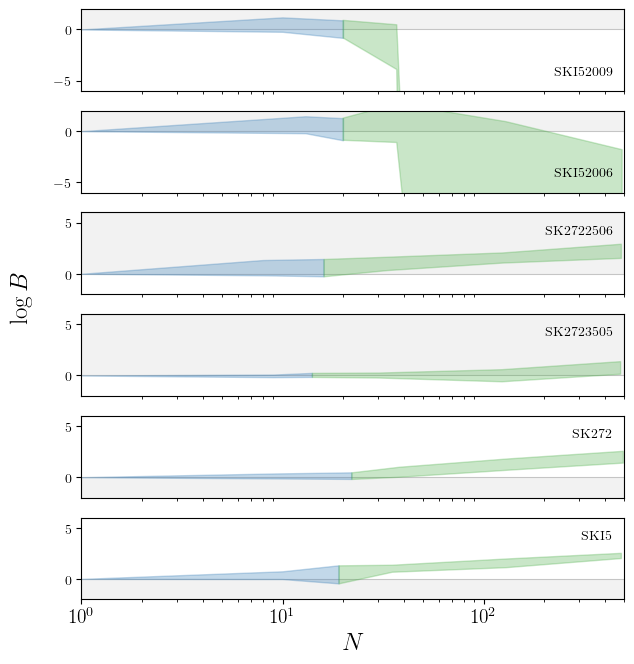

In [59]:
eoss = ['SKI52009','SKI52006','SK2722506','SK2723505','SK272','SKI5']
short_scenarios = ['O5','O5','3G','3G','3G']
scenarios = ['O5','O5y2','3Gd1','3Gw1','3Gm1']
scenario_dict = {'O5': 'A+ (1 yr)', 'O5y2': 'A+ (2 yr)', '3Gd1': 'XG (1 d)', '3Gw1': 'XG (1 wk)', '3Gm1': 'XG (1 mo)'}
pops = ['','v1','v2','v3','v4', 'v5','v6','v7','v8','v9']

import scipy

fig, axs = plt.subplots(6, 1,figsize=(6,6.75))

for j,eos in enumerate(eoss):
    
    bfs_all = []
    
    for pop in pops:
        
        bfs = []
        events = []
        
        for short_scenario,scenario in zip(short_scenarios,scenarios):

            results_path = './results/unif_BNS_{0}{1}/{2}_unif_BNS_{0}_recovery-{3}.csv'.format(eos,pop,short_scenario,scenario)
            dat = np.genfromtxt(results_path,names=True,dtype=None,delimiter=',')
            deltaLs = dat['DeltaL']
            deltaLs = list(deltaLs) + [-dL for dL in deltaLs if dL < 50.]
            kde = scipy.stats.gaussian_kde(deltaLs)
            
            injpath = './results/unif_BNS_{0}{1}/{0}_twinparams.csv'.format(eos,pop)
            inj_dat = np.genfromtxt(injpath,names=True,delimiter=',',dtype=None,encoding=None)
            maxdL = inj_dat['L14']*(inj_dat['Mt']/1.4)**(-6)
            
            grid = np.linspace(0.,maxdL,1000)
            norm = np.trapz(y=kde(grid),x=grid)
            post_at_zero = float(kde(0.)/norm)
            if post_at_zero < 1e-300: post_at_zero = 1e-300
            
            prior_at_zero = (1./maxdL)
            
            bfs += [post_at_zero/prior_at_zero]
        
            detections_path = './results/unif_BNS_{0}{1}/{2}_unif_BNS_{0}_detected-{3}.csv'.format(eos,pop,short_scenario,scenario)
            det = np.genfromtxt(detections_path,names=True,delimiter=',',dtype=None)
            if short_scenario == '3G': events += [events[1]+len(det['mc'])]
            else: events += [len(det['mc'])]

        #axs[j].plot([1.]+[np.mean(event) for event in events],[0.]+list(np.log(bfs)),c=sns.color_palette()[1],alpha=0.2)
        bfs_all += [bfs]
    
    bfs_all = np.array(bfs_all)
    
    #axs[j].plot([1.]+[np.mean(event) for event in events],[0.]+[np.log(np.mean(bfs_all[:,i])) for i in range(len(scenarios))],c=sns.color_palette()[1],alpha=1,label=eos)
    #axs[j].plot([1.]+[np.mean(event) for event in events],[0.]+[np.log(np.quantile(bfs_all[:,i],0.05)) for i in range(len(scenarios))],c=sns.color_palette()[1],alpha=1,label=eos)
    #axs[j].plot([1.]+[np.mean(event) for event in events],[0.]+[np.log(np.quantile(bfs_all[:,i],0.95)) for i in range(len(scenarios))],c=sns.color_palette()[1],alpha=1,label=eos)
    
    axs[j].fill_between([1.]+[np.mean(event) for event in events][:2],[0.]+[np.log(np.quantile(bfs_all[:,i],0.05)) for i in range(len(scenarios))][:2],[0.]+[np.log(np.quantile(bfs_all[:,i],0.95)) for i in range(len(scenarios))][:2],color=sns.color_palette()[1],alpha=0.3)
    axs[j].fill_between([np.mean(event) for event in events][1:],[np.log(np.quantile(bfs_all[:,i],0.05)) for i in range(len(scenarios))][1:],[np.log(np.quantile(bfs_all[:,i],0.95)) for i in range(len(scenarios))][1:],color=sns.color_palette()[2],alpha=0.3)
    
    axs[j].plot([1.,500.],[0.,0.],c='grey',ls='-',lw=0.5,alpha=0.5,label=eos,zorder=-1)
    if eos == 'SK272' or eos == 'SKI5': axs[j].fill_between([1.,500.],-6.,0.,color='grey',alpha=0.1,zorder=-1)
    else: axs[j].fill_between([1.,500.],0.,6.,color='grey',alpha=0.1,zorder=-1)
    
    if eos == 'SKI52009' or eos == 'SKI52006': axs[j].set_ylim(-6.,2.)
    else: axs[j].set_ylim(-2.,6.)
    axs[j].set_xlim(1.,500.)
    if eos == 'SKI52009' or eos == 'SKI52006': axs[j].legend(frameon=False,handlelength=0,loc='lower right')
    else: axs[j].legend(frameon=False,handlelength=0,loc='upper right')
    axs[j].set_xscale('log')
    if j != len(eoss)-1: axs[j].set_xticks([])

axs[j].set_xlabel(r'$N$',size=18)
plt.xticks(fontsize=14)
fig.text(-0.03, 0.55, r'$\log{B}$', size=18, ha='center', va='center', rotation='vertical')     

fig.tight_layout()  
plt.show()

/local/philippe.landry/ipykernel_14483/451369483.py:54: RuntimeWarning: divide by zero encountered in log
  plt.plot([1.]+[np.mean(event) for event in events][:2],[0.]+[np.log(np.quantile(bfs_all[:,i],0.5)) for i in range(len(scenarios))][:2],color=colors[j],ls='--',alpha=1)
/local/philippe.landry/ipykernel_14483/451369483.py:55: RuntimeWarning: divide by zero encountered in log
  plt.plot([np.mean(event) for event in events][1:],[np.log(np.quantile(bfs_all[:,i],0.5)) for i in range(len(scenarios))][1:],color=colors[j],ls='-',alpha=1,label=eos)
/local/philippe.landry/ipykernel_14483/451369483.py:57: RuntimeWarning: divide by zero encountered in log
  plt.errorbar([1.]+[np.mean(event) for event in events][:2],[0.]+[np.log(np.quantile(bfs_all[:,i],0.5)) for i in range(len(scenarios))][:2],yerr=[0.]+[np.log(np.quantile(bfs_all[:,i],0.95))-np.log(np.quantile(bfs_all[:,i],0.05)) for i in range(len(scenarios))][:2],color=colors[j],alpha=1,marker='.',capsize=2,lw=0.5)
/local/philippe.landry/i

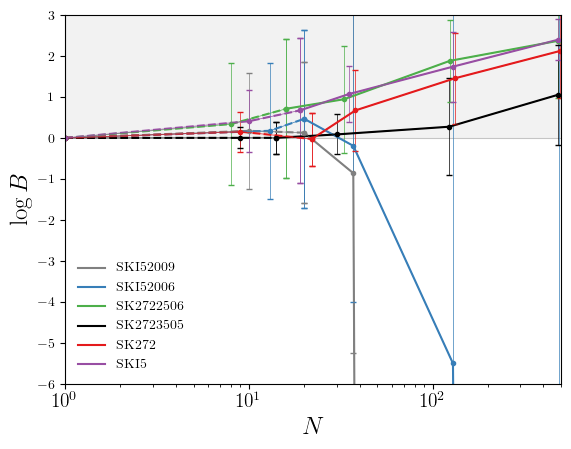

In [10]:
eoss = ['SKI52009','SKI52006','SK2722506','SK2723505','SK272','SKI5']
short_scenarios = ['O5','O5','3G','3G','3G']
scenarios = ['O5','O5y2','3Gd1','3Gw1','3Gm1']
scenario_dict = {'O5': 'A+ (1 yr)', 'O5y2': 'A+ (2 yr)', '3Gd1': 'XG (1 d)', '3Gw1': 'XG (1 wk)', '3Gm1': 'XG (1 mo)'}
pops = ['','v1','v2','v3','v4', 'v5','v6','v7','v8','v9']
colors = ['grey',sns.color_palette()[1],sns.color_palette()[2],'k',sns.color_palette()[0],sns.color_palette()[3]]

import scipy

for j,eos in enumerate(eoss):
    
    bfs_all = []
    
    for pop in pops:
        
        bfs = []
        events = []
        
        for short_scenario,scenario in zip(short_scenarios,scenarios):

            results_path = './results/unif_BNS_{0}{1}/{2}_unif_BNS_{0}_recovery-{3}.csv'.format(eos,pop,short_scenario,scenario)
            dat = np.genfromtxt(results_path,names=True,dtype=None,delimiter=',')
            deltaLs = dat['DeltaL']
            deltaLs = list(deltaLs) + [-dL for dL in deltaLs if dL < 50.]
            kde = scipy.stats.gaussian_kde(deltaLs)
            
            injpath = './results/unif_BNS_{0}{1}/{0}_twinparams.csv'.format(eos,pop)
            inj_dat = np.genfromtxt(injpath,names=True,delimiter=',',dtype=None,encoding=None)
            maxdL = inj_dat['L14']*(inj_dat['Mt']/1.4)**(-6)
            
            grid = np.linspace(0.,maxdL,1000)
            norm = np.trapz(y=kde(grid),x=grid)
            post_at_zero = float(kde(0.)/norm)
            #if float(kde(0.)) < np.sqrt((10*len(deltaLs))**(-4./5.)): post_at_zero = np.sqrt((10*len(deltaLs))**(-4./5.))/norm
            
            prior_at_zero = (1./maxdL)
            
            bfs += [post_at_zero/prior_at_zero]
        
            detections_path = './results/unif_BNS_{0}{1}/{2}_unif_BNS_{0}_detected-{3}.csv'.format(eos,pop,short_scenario,scenario)
            det = np.genfromtxt(detections_path,names=True,delimiter=',',dtype=None)
            if short_scenario == '3G': events += [events[1]+len(det['mc'])]
            else: events += [len(det['mc'])]

        #axs[j].plot([1.]+[np.mean(event) for event in events],[0.]+list(np.log(bfs)),c=sns.color_palette()[1],alpha=0.2)
        bfs_all += [bfs]
    
    bfs_all = np.array(bfs_all)
    
    #axs[j].plot([1.]+[np.mean(event) for event in events],[0.]+[np.log(np.mean(bfs_all[:,i])) for i in range(len(scenarios))],c=sns.color_palette()[1],alpha=1,label=eos)
    #plt.plot([1.]+[np.mean(event) for event in events],[0.]+[np.log(np.quantile(bfs_all[:,i],0.05)) for i in range(len(scenarios))],c=sns.color_palette()[1],alpha=1,label=eos)
    #plt.plot([1.]+[np.mean(event) for event in events],[0.]+[np.log(np.quantile(bfs_all[:,i],0.95)) for i in range(len(scenarios))],c=sns.color_palette()[1],alpha=1,label=eos)
    
    plt.plot([1.]+[np.mean(event) for event in events][:2],[0.]+[np.log(np.quantile(bfs_all[:,i],0.5)) for i in range(len(scenarios))][:2],color=colors[j],ls='--',alpha=1)
    plt.plot([np.mean(event) for event in events][1:],[np.log(np.quantile(bfs_all[:,i],0.5)) for i in range(len(scenarios))][1:],color=colors[j],ls='-',alpha=1,label=eos)
    
    plt.errorbar([1.]+[np.mean(event) for event in events][:2],[0.]+[np.log(np.quantile(bfs_all[:,i],0.5)) for i in range(len(scenarios))][:2],yerr=[0.]+[np.log(np.quantile(bfs_all[:,i],0.95))-np.log(np.quantile(bfs_all[:,i],0.05)) for i in range(len(scenarios))][:2],color=colors[j],alpha=1,marker='.',capsize=2,lw=0.5)
    plt.errorbar([np.mean(event) for event in events][1:],[np.log(np.quantile(bfs_all[:,i],0.5)) for i in range(len(scenarios))][1:],yerr=[np.log(np.quantile(bfs_all[:,i],0.95))-np.log(np.quantile(bfs_all[:,i],0.05)) for i in range(len(scenarios))][1:],color=colors[j],alpha=1,marker='.',capsize=2,lw=0.5)
    
plt.plot([1.,500.],[0.,0.],c='grey',ls='-',lw=0.5,alpha=0.5,zorder=-1)
    #if eos == 'SK272' or eos == 'SKI5': plt.fill_between([1.,500.],-6.,0.,color='grey',alpha=0.1,zorder=-1)
plt.fill_between([1.,500.],0.,6.,color='grey',alpha=0.1,zorder=-1)
    
    #if eos == 'SKI52009' or eos == 'SKI52006': axs[j].set_ylim(-6.,2.)
    #else: axs[j].set_ylim(-2.,6.)
plt.xlim(1.,500.)
plt.ylim(-6.,3.)
    #if eos == 'SKI52009' or eos == 'SKI52006': axs[j].legend(frameon=False,handlelength=0,loc='lower right')
    #else: axs[j].legend(frameon=False,handlelength=0,loc='upper right')
plt.xscale('log')
    #if j != len(eoss)-1: axs[j].set_xticks([])

plt.xlabel(r'$N$',size=18)
plt.ylabel(r'$\log{B}$', size=18)
plt.xticks(fontsize=14) 

plt.legend(frameon=False)
plt.show()